In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, r):
    return r * x * (1 - x)

def g(x, r):
    return r * x * (1 - x) * (3 - x)


---

**<h3> $ \text{EASY LEVEL} $**

> **<h4>$ \text{Задание 1} $**

Пусть задано одномерное логистическое отображение  
$$
x_{n+1} = r x_n (1 - x_n), \quad n \in \mathbb{N}_0,
$$  
где $ 0 < x_0 < 1 $ и $ r \in (0, 1] $.

Требуется доказать, что для всех $ n \in \mathbb{N} $ выполняется  
$$
0 < x_n < 1.
$$

**Доказательство (по математической индукции)**

**База индукции ($ n = 0 $):**   
По условию $ 0 < x_0 < 1 $, следовательно, утверждение верно для $ n = 0 $.

**Предположение:**  
Пусть для некоторого $ k \geq 0 $ выполнено  
$$
0 < x_k < 1.
$$

**Шаг:**  
Рассмотрим  
$$
x_{k+1} = r x_k (1 - x_k).
$$

- **Положительно:**  
   Так как $ 0 < x_k < 1 $, то $ 1 - x_k > 0 $.  
   Следовательно, $ x_k(1 - x_k) > 0 $.  
   Поскольку $ r > 0 $, получаем $ x_{k+1} > 0 $.

- **Ограничено сверху единицей:**  
   У функции $ f(x) = r x (1 - x) $ на интервале $ (0, 1) $ максимум достигается при $ x = \frac{1}{2} $:  
   $$
   f\!\left(\frac{1}{2}\right) = r \cdot \frac{1}{2} \cdot \left(1 - \frac{1}{2}\right) = \frac{r}{4}.
   $$  
   Так как $ r \leq 1 $, то  
   $$
   x_{k+1} = f(x_k) \leq \frac{r}{4} \leq \frac{1}{4} < 1.
   $$

**Таким образом**, из $ 0 < x_k < 1 $ следует $ 0 < x_{k+1} < 1 $.

> **<h4>$ \text{Задание 2} $**

Параметр $ r $ управляет наклоном и высотой параболы $ f_r(x) $.
Далее я покажу это на графике для нескольких значений $ r $.

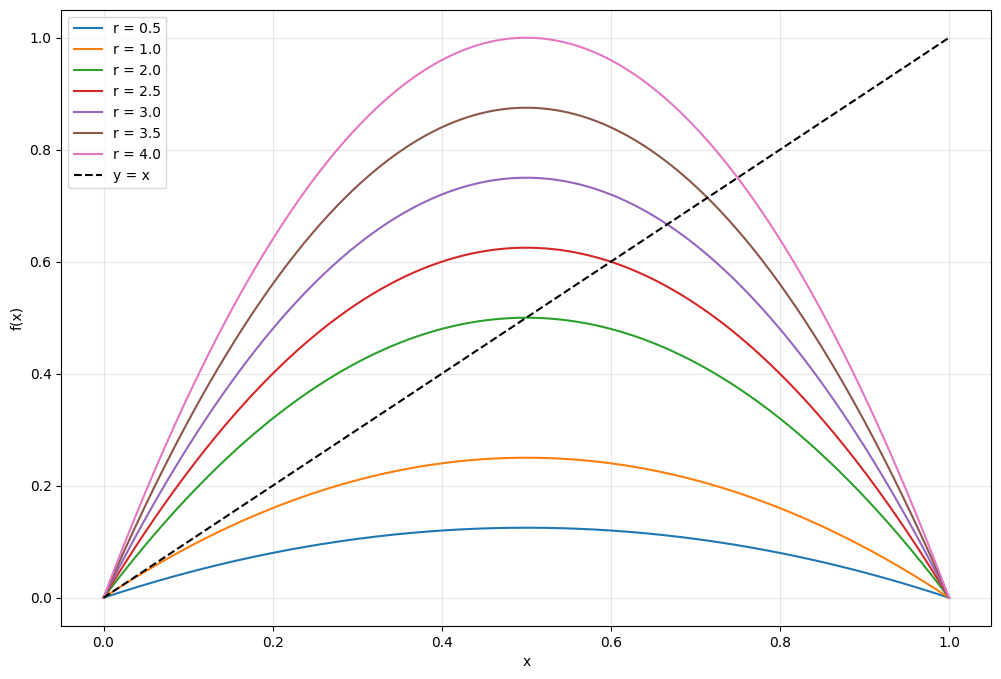

In [6]:
r_vals = [0.5, 1.0, 2.0, 2.5, 3.0, 3.5, 4.0]
x = np.linspace(0, 1, 500)

plt.figure(figsize=(12, 8))
for r in r_vals:
    plt.plot(x, f(x, r), label=f'r = {r}')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, x, 'k--', label='y = x')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**По графику:**

- Чем больше $ r $, тем выше поднимается парабола.  
  Например, при $ r = 0.5 $ её максимум всего $ 0.125 $, а при $ r = 4 $ уже $ 1 $.

- При маленьких $ r $ (например, $ r = 0.5 $ или $ r = 1 $) график функции лежит ниже прямой $ y = x $.  
  Это значит, что если взять любое $ x_{n-1} \in (0,1) $, то следующее значение  
  $ x_n = f_r(x_{n-1}) < x_{n-1}, $  
  то есть последовательность будет уменьшаться и стремиться к нулю.

- При больших $ r $ (например, $ r = 2 $ или $ r = 2.5 $) график пересекает прямую $ y = x $.  
  В точке пересечения может выполняться $ x_n = x_{n-1} $.  
  Если начать с $ x_0 $, близкого к этой точке, то последовательность будет к ней приближаться.

- При еще больших $ r $ (например, $ r = 3.5 $ или $ r = 4 $) парабола поднимается так высоко, что значение $ x_n $ может сначала стать большим, потом маленьким, потом снова большим и т.д.

**Интерпретация:**

Параметр $ r $ управляет тем, насколько быстро растёт популяция.  
- Если $ r $ маленькое, то популяция постепенно исчезает.  
- Если $ r $ умеренное, то популяция стабилизируется на каком-то уровне.  
- Если $ r $ слишком большое, то численность то резко растёт, то падает.

> **<h4>$ \text{Задание 3} $**

$ \text{N} = \text{ISU} \mod 5 = 501773 \mod 5 = 3$

Для моего варианта задана функция:
$$
x_{n+1} = g(x_n) = r \cdot x_n \cdot (1 - x_n) \cdot (3 - x_n),
$$
где параметр $ r \in \left[0; \frac{27}{2(7\sqrt{7} - 10)}\right] $.

К стандартному выражению $ r x (1 - x) $ добавлен множитель $ (3 - x) $, что делает функцию кубической вместо квадратичной.

Построю график для нескольких значений $ r $, чтобы увидеть, как она отличается от обычного логистического отображения.

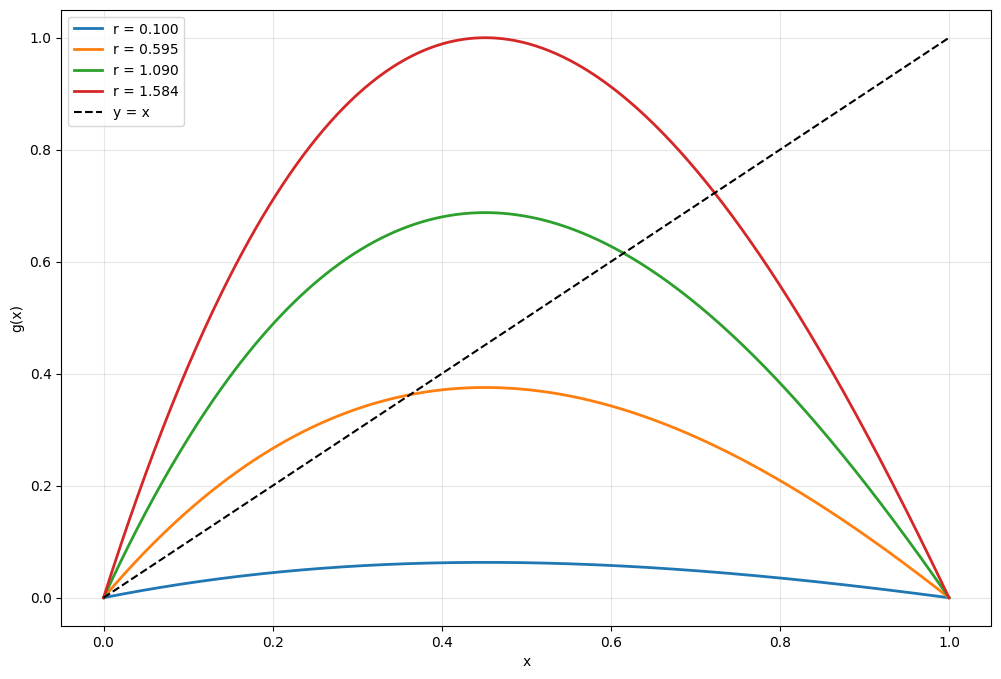

In [5]:
r_max = 27 / (2 * (7 * np.sqrt(7) - 10))

r_values = np.linspace(0.1, r_max, 4)

x = np.linspace(0, 1, 500)

plt.figure(figsize=(12, 8))

for r in r_values:
    y = g(x, r)
    plt.plot(x, y, label=f'r = {r:.3f}', linewidth=2)

plt.plot(x, x, 'k--', label='y = x', linewidth=1.5)

plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Сходства:**

- Обе функции равны нулю при $ x_n = 0 $ и $ x_n = 1 $.  
  Это означает, что если популяция исчезла ($ x = 0 $) или достигла максимума ($ x = 1 $), то на следующем шаге она не будет расти.

- При малых значениях $ r $ обе функции лежат ниже диагонали $ y = x $.  
  Это приводит к тому, что последовательность $ x_n $ монотонно убывает к нулю, т.е. популяция вымирает.

- При увеличении $ r $ обе функции начинают пересекать диагональ $ y = x $.  
  В точках пересечения выполняется $ x_{n+1} = x_n $ - это точки, где система может стабилизироваться.

**Различия:**

- Моя функция растёт быстрее при малых $ x_n $.  
  Например, при $ x_n = 0.1 $:  
  - Классическая: $ f(x) \approx r \cdot 0.1 \cdot 0.9 = 0.09r $,  
  - Моя: $ f(x) \approx r \cdot 0.1 \cdot 0.9 \cdot 2.9 = 0.261r $.  
  То есть численность популяции увеличивается почти в 3 раза сильнее в начале.

- Из-за множителя $ (3 - x_n) $ моя функция не симметрична и имеет более крутой подъём в левой части графика и более плавный спуск в правой.


---

**<h3> $ \text{NORMAL LEVEL} $**

> **<h4>$ \text{Задание 1} $**

**Неподвижные точки $ f(x)$:**
$$
x^* = r x^* (1 - x^*)
$$

Перенесу всё в одну сторону:

$$
x^* - r x^* (1 - x^*) = 0
$$

Вынесу $ x^* $ за скобки:

$$
x^* \left[1 - r(1 - x^*)\right] = 0
$$

Получаю два решения:

- $ x^* = 0 $
- $ 1 - r(1 - x^*) = 0 \quad \Rightarrow \quad 1 = r(1 - x^*) \quad \Rightarrow \quad 1 - x^* = \frac{1}{r} \quad \Rightarrow \quad x^* = 1 - \frac{1}{r} $

Второе решение имеет смысл только при $ r \neq 0 $.

Также, поскольку $ x^* \in [0, 1] $, то $ 1 - \frac{1}{r} \geq 0 \Rightarrow r \geq 1 $.

**Таким образом**, неподвижные точки:

- При всех $ r \in [0, 4] $: $ x^* = 0 $
- При $ r \in [1, 4] $: $ x^* = 0 \quad $ и $ \quad x^* = 1 - \frac{1}{r} $

Если привести к стандартному виду:
$$
x - r x + r x^2 = 0 \quad \Rightarrow \quad r x^2 + (1 - r) x = 0
$$

Квадратное уравнение может иметь не более двух корней.
Поэтому максимальное количество неподвижных точек - **две**.

> **<h4>$ \text{Задание 2} $**

**Доказательство:**

Покажу, что для всех $ n \in \mathbb{N} $ выполняется $ x_{n+1} < x_n $.

$$
x_n - x_{n+1} = x_n - r x_n (1 - x_n) = x_n \left[1 - r(1 - x_n)\right]
$$

Так как $ x_0 \in (0, 1) $, и из предыдущего задания мы знаем, что при $ r \in (0, 1] $ все $ x_n \in (0, 1) $, то:

- $ x_n > 0 $
- $ 1 - x_n > 0 $
- $ r \leq 1 \quad \Rightarrow \quad r(1 - x_n) \leq 1 - x_n < 1 \quad \Rightarrow \quad 1 - r(1 - x_n) > 0 $

Следовательно:
$$
x_n - x_{n+1} = x_n \cdot \left[1 - r(1 - x_n)\right] > 0
\quad \Rightarrow \quad x_{n+1} < x_n
$$

Таким образом, последовательность $ \{x_n\} $ монотонно убывает, ч.т.д.

**Cуществования предела:**

Я доказал, что последовательность $ \{x_n\} $:

- Монотонно убывает
- Ограничена снизу нулём (поскольку $ x_n > 0 $ для всех $ n $)

По теореме о монотонной ограниченной последовательности: если последовательность монотонна и ограничена, то она сходится.

Следовательно, предел $ \lim_{n \to \infty} x_n $ существует, ч.т.д.

Более того, так как последовательность убывает и положительна, её предел не может быть больше нуля. На самом деле, можно показать, что:
$$
\lim_{n \to \infty} x_n = 0
$$
Потому что единственная неподвижная точка при $ r \in (0, 1] $ — это $ x^* = 0 $. А поскольку последовательность монотонно убывает и сходится, она должна сходиться к неподвижной точке.

Построю график и покажу, как последовательность стремится к нулю.

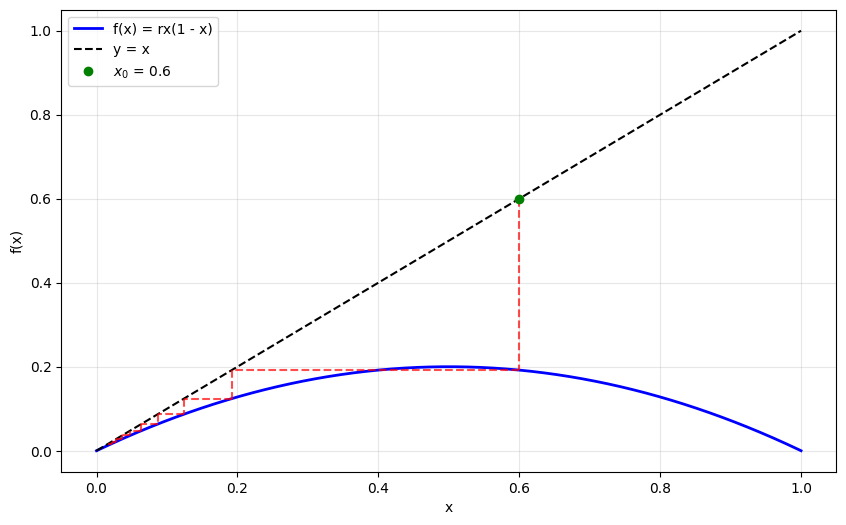

In [10]:
# Параметры
r = 0.8
x0 = 0.6
n_steps = 10

xs = [x0]
for _ in range(n_steps - 1):
    xs.append(f(xs[-1], r))

x = np.linspace(0, 1, 500)
y = f(x, r)

plt.figure(figsize=(10, 6))

plt.plot(x, y, 'b-', label=r'f(x) = rx(1 - x)', linewidth=2)

plt.plot(x, x, 'k--', label='y = x', linewidth=1.5)

# Точки последовательности
for i in range(len(xs) - 1):
    plt.plot([xs[i], xs[i]], [xs[i], xs[i+1]], 'r--', alpha=0.7)  # Вертикаль
    plt.plot([xs[i], xs[i+1]], [xs[i+1], xs[i+1]], 'r--', alpha=0.7)  # Горизонталь

# Начальная точка
plt.plot(xs[0], xs[0], 'go', label=f'$x_0$ = {x0}')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Можно заметить, что:**

- График функции $ f(x) $ лежит **ниже** диагонали $ y = x $ во всём интервале $ (0, 1) $.  
  Это означает, что для любого $ x_n \in (0, 1) $ выполняется: $ x_{n+1} = f(x_n) < x_n. $  
  То есть, последовательность монотонно убывает.

- Начав с $ x_0 = 0.6 $, видно, как последовательность стремиться по ступенькам к 0, но можно выбрать и другую начальную точку, будет то же самое.

- На графике видно, что предел ноль, ч.т.д.


> **<h4>$ \text{Задание 3} $**

**Доказательство:**

Функция второго порядка:
$$
f^{(2)}(x) = f(f(x)) = r \cdot f(x) \cdot (1 - f(x))
$$

Поскольку $ x_{n+2} = f^{(2)}(x_n) $, то:

- Чётные члены: $ x_0,\ x_2,\ x_4,\ \dots $ - это последовательность, заданная $ f^{(2)} $
- Нечётные члены: $ x_1,\ x_3,\ x_5,\ \dots $ - тоже задаются $ f^{(2)} $, но начиная с $ x_1 $

Подпоследовательность чётных членов $ \{x_{2n}\} $:

- По условию $ x_{2n} > x^* $
- Тогда $ x_{2n+2} = f^{(2)}(x_{2n}) < x_{2n} $, потому что $ f^{(2)}(x) < x $ при $ x > x^* $
- Значит $ \{x_{2n}\} $ монотонно убывает.

Аналогично для нечётных членов $ \{x_{2n+1}\} $:

- По условию $ x_{2n+1} < x^* $
- Тогда $ x_{2n+3} = f^{(2)}(x_{2n+1}) > x_{2n+1} $, потому что $ f^{(2)}(x) > x $ при $ x < x^* $
- Значит $ \{x_{2n+1}\} $ монотонно возрастает.

Обе подпоследовательности ограничены:  
- $ \{x_{2n}\} $ ограничена снизу $ x^* $,  
- $ \{x_{2n+1}\} $ ограничена сверху $ x^* $.

По теореме о монотонной ограниченной последовательности они обе сходятся.  
Поскольку $ x_{2n} \to L_1 $, $ x_{2n+1} \to L_2 $, и $ x_{2n+1} = f(x_{2n}) $, то: $ L_2 = f(L_1) $, $ L_1 = f(L_2) $, значит, $ L_1 = L_2 = x^* $.

**Таким образом:**
- $ \{x_{2n}\} $ монотонно убывает к $ x^* $
- $ \{x_{2n+1}\} $ монотонно возрастает к $ x^* $

**Проверка:**

Построю график функции и покажу, как ступеньки последовательности образуют две подпоследовательности: одну выше $ x^* $, другую - ниже.

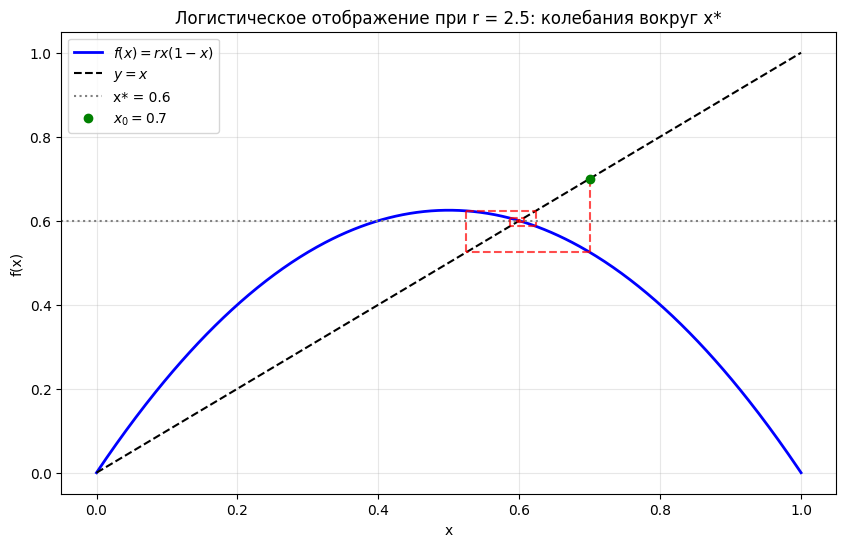

In [11]:
# Параметры
r = 2.5
x0 = 0.7
n_steps = 10

xs = [x0]
for _ in range(n_steps - 1):
    xs.append(f(xs[-1], r))

# Неподвижная точка
x_star = 1 - 1/r

x = np.linspace(0, 1, 500)
y = f(x, r)

plt.figure(figsize=(10, 6))

plt.plot(x, y, 'b-', label=r'$f(x) = r x (1 - x)$', linewidth=2)

plt.plot(x, x, 'k--', label='$y = x$', linewidth=1.5)

# Горизонтальная линия через x*
plt.axhline(x_star, color='gray', linestyle=':', label=f'x* = {x_star}')

# Точки последовательности
for i in range(len(xs) - 1):
    plt.plot([xs[i], xs[i]], [xs[i], xs[i+1]], 'r--', alpha=0.7)  # вертикаль
    plt.plot([xs[i], xs[i+1]], [xs[i+1], xs[i+1]], 'r--', alpha=0.7)  # горизонталь

# Начальная точка
plt.plot(xs[0], xs[0], 'go', label=f'$x_0 = {x0}$')

plt.title(f'Логистическое отображение при r = {r}: колебания вокруг x*')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Можно заметить, что:**

- Начальное значение $ x_0 = 0.7 > x^* = 0.6 $
- Следующее значение:  
  $$
  x_1 = f(0.7) = 2.5 \cdot 0.7 \cdot (1 - 0.7) = 2.5 \cdot 0.7 \cdot 0.3 = 0.525 < x^*
  $$
  это нечётный член $ x_1 < x^* $

- Затем:  
  $$
  x_2 = f(0.525) = 2.5 \cdot 0.525 \cdot (1 - 0.525) = 2.5 \cdot 0.525 \cdot 0.475 \approx 0.623 > x^*
  $$
  это чётный член $ x_2 > x^* $, но меньше $ x_0 = 0.7 $

- Далее:  
  $$
  x_3 = f(0.623) \approx 2.5 \cdot 0.623 \cdot (1 - 0.623) \approx 0.585 < x^*
  $$
  это нечётный член $ x_3 < x^* $, но больше $ x_1 = 0.525 $

**Таким образом:**

- Подпоследовательность чётных членов:  
$ x_0 = 0.7,\ x_2 \approx 0.623, \dots $ - монотонно убывает к $ x^* = 0.6 $
- Подпоследовательность нечётных членов:  
$ x_1 = 0.525,\ x_3 \approx 0.585, \dots $ - монотонно возрастает к $ x^* = 0.6 $

> **<h4>$ \text{Задание 4} $**

**Неподвижные точки $ g(x)$:**
$$
x_{n+1} = r \cdot x_n \cdot (1 - x_n) \cdot (3 - x_n).
$$

Неподвижная точка $ x^* $ удовлетворяет уравнению $ x^* = f_r(x^*) $, то есть:
$$
x^* = r \cdot x^* \cdot (1 - x^*) \cdot (3 - x^*).
$$

Переношу всё в одну часть и выношу x*:
$$
x^* - r x^* (1 - x^*)(3 - x^*) = 0,
$$
$$
x^* \left[1 - r(1 - x^*)(3 - x^*)\right] = 0.
$$

Отсюда два решения:

- $ x^* = 0 $,
- $ 1 - r(1 - x^*)(3 - x^*) = 0 \quad \Rightarrow \quad r(1 - x^*)(3 - x^*) = 1 $.

Раскрываю скобки:
$$
(1 - x^*)(3 - x^*) = 3 - 4x^* + (x^*)^2,
$$
$$
r(3 - 4x^* + (x^*)^2\big) = 1,
$$
$$
r(x^*)^2 - 4r x^* + (3r - 1) = 0.
$$

Решаю через обычную формулу для квадратных уравнений:
$$
x^* = \frac{4r \pm \sqrt{(4r)^2 - 4r(3r - 1)}}{2r} = \frac{4r \pm \sqrt{4r^2 + 4r}}{2r} = \frac{2r \pm \sqrt{r^2 + r}}{r}.
$$

Таким образом:
$$
x^* = 2 \pm \sqrt{1 + \frac{1}{r}}.
$$

Поскольку $ x^* \in [0, 1] $, отбрасываю корень с + (он больше 2). Остаётся:
$$
x^* = 2 - \sqrt{1 + \frac{1}{r}}.
$$

Тогда неподвижные точки:
- $ x^* = 0 $,
- $ x^* = 2 - \sqrt{1 + \dfrac{1}{r}} $

**Диапазон параметра $ r $:**

Последовательность монотонно сходится к нулю, если $ f_r(x) < x $ для всех $ x \in (0,1) $, то есть:
$$
r x (1 - x)(3 - x) < x.
$$

При $ x > 0 $ можно разделить обе части на $ x $:
$$
r (1 - x)(3 - x) < 1 , \ x \in (0,1).
$$

Пусть функция $ h(x) = (1 - x)(3 - x) = 3 - 4x + x^2 $.  
На интервале $ (0,1) $ она убывает от $ h(0) = 3 $ до $ h(1) = 2 $, поэтому её максимум равен 3.

Чтобы неравенство выполнялось для всех $ x \in (0,1) $, достаточно:
$$
r \cdot 3 < 1 \quad \Rightarrow \quad r < \frac{1}{3}.
$$

При $ r = \frac{1}{3} $:  
$ f_r(x) = \frac{1}{3} x (1 - x)(3 - x) \leq \frac{1}{3} \cdot x \cdot 3 = x $,  
и равенство достигается только при $ x = 0 $, значит, последовательность строго убывает.

Следовательно, монотонная сходимость к нулю происходит при:
$$
r \in \left(0, \frac{1}{3}\right].
$$

**Графики зависимости $ x_n $ от $ n $ для нескольких значений параметра $ r $**

In [ ]:
r_max = 27 / (2 * (7 * np.sqrt(7) - 10))
print(f"Максимальное значение r: {r_max:.6f}")

Максимальное значение r: 1.584459


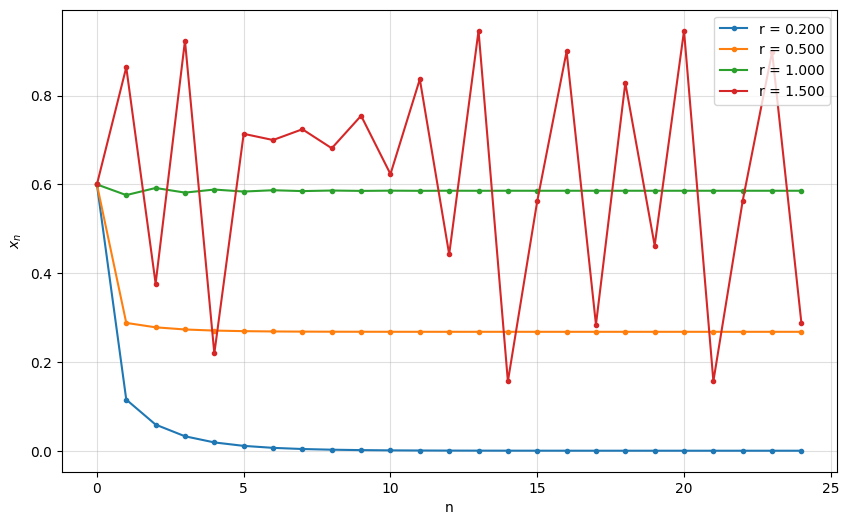

In [14]:
r_vals = [0.2, 0.5, 1.0, 1.5]  # Все <= 1.584
x0 = 0.6
n_steps = 25

plt.figure(figsize=(10, 6))

for r in r_vals:
    xs = [x0]
    for _ in range(n_steps - 1):
        next_x = g(xs[-1], r)
        xs.append(next_x)
    plt.plot(range(n_steps), xs, 'o-', label=f'r = {r:.3f}', markersize=3)

plt.xlabel('n')
plt.ylabel('$x_n$')
plt.grid(True, alpha=0.4)
plt.legend()
plt.show()

**Можно заметить, что:**

- При $ r = 0.2 $ (синяя линия):  
  Последовательность монотонно убывает к нулю.

- При $ r = 0.5 $ (оранжевая линия):  
  Последовательность сходится к значению около $ 0.27 $.  
  Это неподвижная точка $ x^* = 2 - \sqrt{1 + \frac{1}{0.5}} = 2 - \sqrt{3} \approx 0.268 $.

- При $ r = 1.0 $ (зелёная линия):  
  Последовательность быстро стабилизируется около $ 0.586 $.  
  Это неподвижная точка $ x^* = 2 - \sqrt{2} \approx 0.586 $.

- При $ r = 1.5 $ (красная линия):  
  Последовательность колеблется вокруг значения $ 0.71 $, но не сходится сразу.  
  Это неподвижная точка $ x^* = 2 - \sqrt{1 + \frac{1}{1.5}} \approx 0.710 $.

---

**<h3> $ \text{HARD LEVEL} $**


> **<h4>$ \text{Задание 1} $**

**Как изменяется длина цикла при $ r \in (3; r_\infty) $?**

In [15]:
# Параметры
r = 2.9
x = 0.5

for i in range(10):
    x = r * x * (1 - x)
    print(f"x_{i+1} = {x:.6f}")

x_1 = 0.725000
x_2 = 0.578188
x_3 = 0.707271
x_4 = 0.600412
x_5 = 0.695761
x_6 = 0.613865
x_7 = 0.687400
x_8 = 0.623155
x_9 = 0.681015
x_10 = 0.629977


- При $ r = 2.9 $: цикл длины **1**.
- При $ r = 3.2 $: цикл длины **2**.
- При $ r = 3.5 $: цикл длины **4**.
- При $ r = 3.56 $: цикл длины **8**.

Каждый раз, когда $ r $ немного увеличивается, длина цикла удваивается.

Чем ближе $ r $ к $ r_\infty \approx 3.5699 $, тем длиннее становится цикл:  
$$
m = 2,\ 4,\ 8, \dots
$$

В пределе, при $ r = r_\infty $, длина цикла становится бесконечной (значения больше никогда не повторяются).

**Экспериментальное установление ограничений на $ m $ при $ r \in (3; r_\infty) $**

Проведу вычислительный эксперимент: буду строить последовательность для разных $ r \in (3; r_\infty) $ и смотреть, сколько разных значений она принимает после завершения переходного процесса.

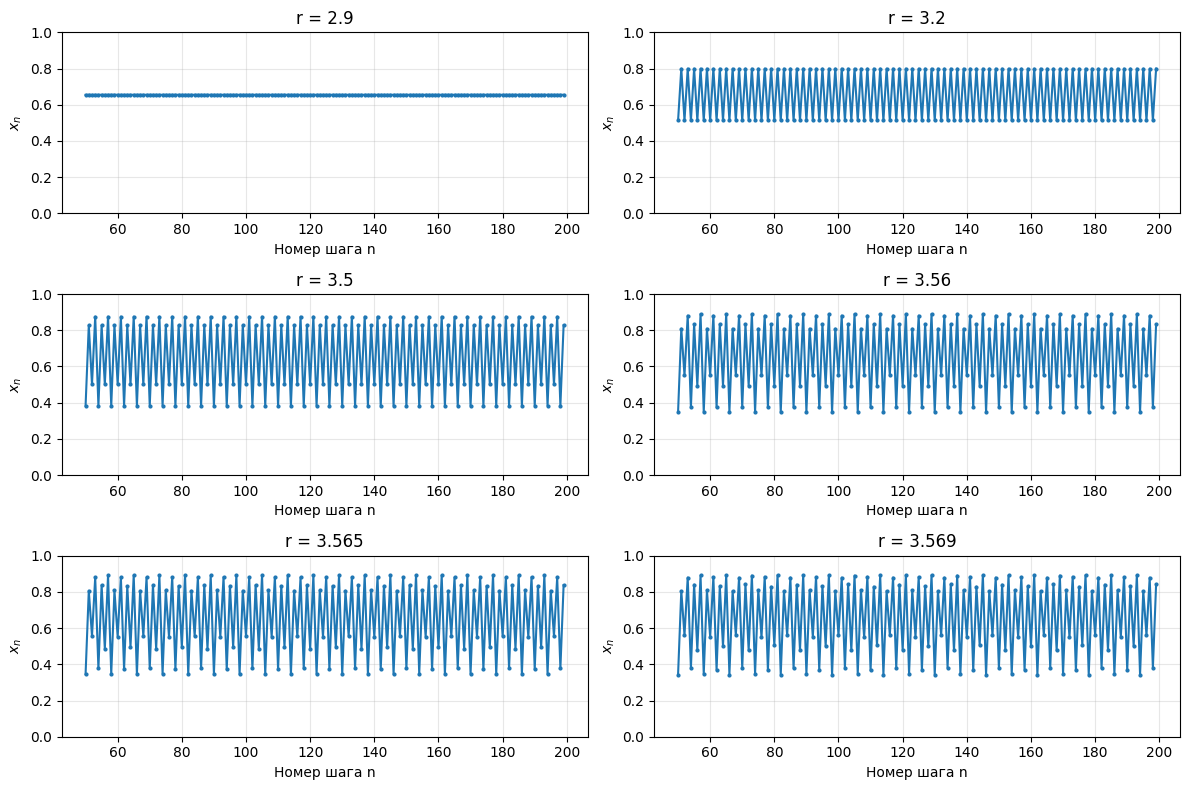

In [ ]:
r_values = [2.9, 3.2, 3.5, 3.56, 3.565, 3.569]
x0 = 0.5
n_steps = 200
burn_in = 50  # Пропускаю первые 50 шагов

plt.figure(figsize=(12, 8))

for i, r in enumerate(r_values):
    xs = [x0]
    for _ in range(n_steps - 1):
        xs.append(f(xs[-1], r))

    # Беру только устаканившуюся часть
    steady = xs[burn_in:]

    plt.subplot(3, 2, i + 1)
    plt.plot(range(burn_in, n_steps), steady, 'o-', markersize=2)
    plt.title(f'r = {r}')
    plt.xlabel('Номер шага n')
    plt.ylabel('$x_n$')
    plt.ylim(0, 1)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Можно заметить, что:**

- При $ r = 2.9 $: последовательность быстро сходится к одному значению (цикл длины 1).
- При $ r = 3.2 $: появляются два значения, которые чередуются (цикл длины 2).
- При $ r = 3.5 $: четыре разных значения (цикл длины 4).
- При $ r = 3.56 $: восемь значений (цикл длины 8).
- При $ r = 3.565 $: шестнадцать или более значений (цикл длины 16+).
- При $ r = 3.569 $: значения колеблются так часто, что почти заполняют весь интервал.

Каждый раз, когда $ r $ увеличивается, количество различных значений, через которые проходит последовательность, удваивается.

Это означает, что длина цикла $ m $ принимает значения:
$$
m = 1,\ 2,\ 4,\ 8,\ 16,\ \dots
$$
и растёт по степеням двойки по мере приближения $ r \to r_\infty \approx 3.5699 $.

Ограничение на $ m $: оно всегда является степенью двойки.

> **<h4>$ \text{Задание 2}$**

Функция `lamerey_staircase` строит лестницу Ламерея.

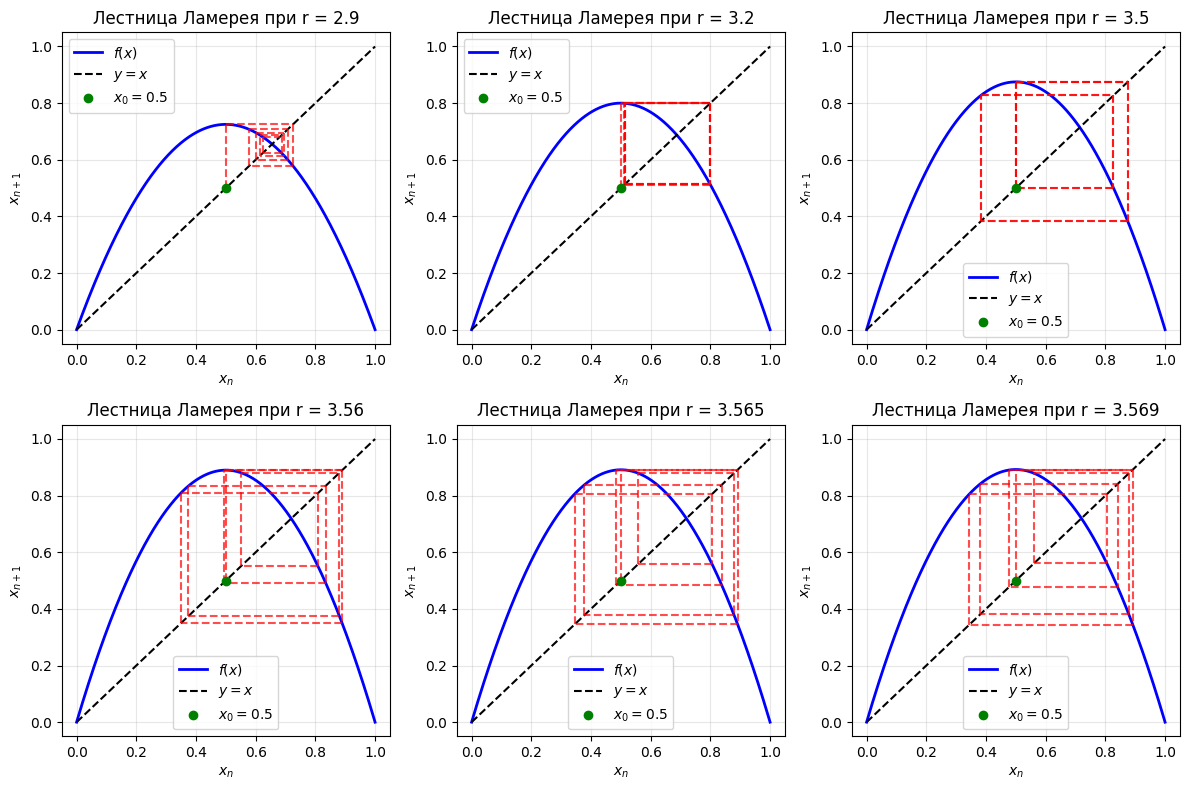

In [20]:
def lamerey_staircase(f, r, x0, n_steps=10, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))

    x = np.linspace(0, 1, 500)
    y = f(x, r)

    ax.plot(x, y, 'b-', linewidth=2, label=f'$f(x)$')

    ax.plot(x, x, 'k--', linewidth=1.5, label='$y = x$')

    xs = [x0]
    for _ in range(n_steps - 1):
        next_x = f(xs[-1], r)
        xs.append(next_x)

    # Лестница Ламерея
    for i in range(len(xs) - 1):
        ax.plot([xs[i], xs[i]], [xs[i], xs[i+1]], 'r--', alpha=0.7) # Вертикаль
        ax.plot([xs[i], xs[i+1]], [xs[i+1], xs[i+1]], 'r--', alpha=0.7) # Горизонталь

    # Начальная точка
    ax.plot(xs[0], xs[0], 'go', label=f'$x_0 = {x0}$')

    ax.set_title(f'Лестница Ламерея при r = {r}')
    ax.set_xlabel('$x_n$')
    ax.set_ylabel('$x_{n+1}$')
    ax.legend()
    ax.grid(True, alpha=0.3)

# Пример
plt.figure(figsize=(12, 8))

for i, r in enumerate([2.9, 3.2, 3.5, 3.56, 3.565, 3.569]):
    ax = plt.subplot(2, 3, i + 1)
    lamerey_staircase(f, r, 0.5, n_steps=10, ax=ax)

plt.tight_layout()
plt.show()

**Можго заметить, что:**

- При $ r = 2.5 $: лестница сходится к одной точке на диагонали (сходимость к неподвижной точке).
- При $ r = 3.2 $: лестница образует прямоугольник (цикл длины 2).
- При $ r = 3.5 $: лестница образует более сложную петлю (цикл длины 4).
- При $ r = 3.56 $: лестница образует еще более сложную петлю (цикл длины 8).
- При $ r = 3.565 $: график похож на $ r = 3.56 $, но уже тяжело разглядеть (цикл длины 16+).
- При $ r = 3.569 $: тяжело разлядеть (длина цикла $ \to \infty $)

Каждый раз, когда $ r $ увеличивается, форма лестницы становится сложнее.

> **<h4>$ \text{Задание 3}$**

**Как изменяется длина цикла с изменением параметра $ r $ для $ g(x) $?**

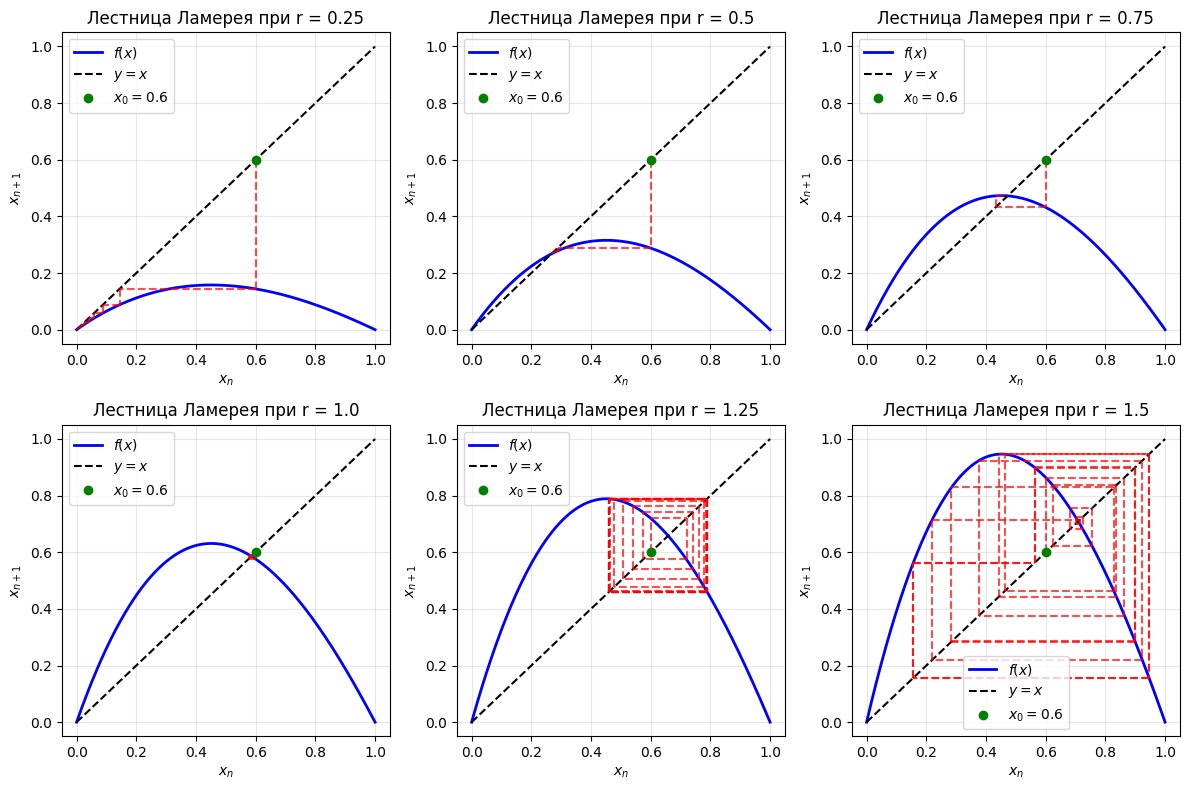

In [23]:
r_values = [0.25, 0.5, 0.75, 1.0, 1.25, 1.5]  # Все <= 1.584

plt.figure(figsize=(12, 8))

for i, r in enumerate(r_values):
    ax = plt.subplot(2, 3, i + 1)
    lamerey_staircase(g, r, 0.6, n_steps=25, ax=ax)

plt.tight_layout()
plt.show()

In [26]:
# Параметры
r = 1.5
x = 0.6

print("n     x_n")
for i in range(50):
    print(f"{i+1:2d}    {x:.6f}")
    x = g(x, r)

n     x_n
 1    0.600000
 2    0.864000
 3    0.376483
 4    0.923780
 5    0.219280
 6    0.714074
 7    0.700084
 8    0.724358
 9    0.681544
10    0.754802
11    0.623298
12    0.837066
13    0.442492
14    0.946378
15    0.156321
16    0.562556
17    0.899734
18    0.284207
19    0.828724
20    0.462287
21    0.946228
22    0.156745
23    0.563714
24    0.898772
25    0.286757
26    0.832399
27    0.453606
28    0.946676
29    0.155478
30    0.560249
31    0.901623
32    0.279187
33    0.821311
34    0.479615
35    0.943573
36    0.164235
37    0.583863
38    0.880563
39    0.334358
40    0.889909
41    0.310092
42    0.863197
43    0.378495
44    0.925010
45    0.215901
46    0.706971
47    0.712547
48    0.702787
49    0.719754
50    0.689917


**Можно заметить, что:**

- При $ r = 0.25 $: лестница очень быстро сходится к нулю.
- При $ r = 0.5 $: лестница сходится к нулю, но медленнее.
- При $ r = 0.75 $: лестница начинает подниматься выше, но всё равно сходится к нулю.
- При $ r = 1.0 $: лестница сходится к точке $ x^* \approx 0.6 $.
- При $ r = 1.25 $: появляется цикл длины 2 (проверка выше).
- При $ r = 1.5 $: уже появляется хаос, система ни к чему не сходиться, но и цикла я не вижу (проверка выше).

**Сравнение с классическим логистическим отображением**
- **Сходство**: Обе системы проходят путь: сходимость, потом циклы, затем хаос.
- **Главное различие**:  
  В моем отображении этот путь происходит при меньших значениях $ r $:
  - Цикл длины 2 появляется при $ r \approx 1.25 $ (в классическом при $ r \approx 3.0 $).
  - Хаос возникает уже при $ r \approx 1.5 $ (в классическом только при $ r \geq 3.57 $).
- **Причина**:  
  Дополнительный множитель $ (3 - x) $ делает функцию более нелинейной, поэтому циклы и хаос проявляется раньше.